## En este notebook vamos a analizar los checkout y las caracteristicas de estos celulares. Ademas vamos a analizar las busquedas y ver si hay una correlacion entre los eventos.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [4]:
checkout = events[events['event'] == 'checkout']
checkout = checkout[['timestamp', 'person','model','condition','storage','color']]
checkout.head()

,timestamp,person,model,condition,storage,color
3,2018-05-31 23:38:40,0004b0a2,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,0006a21a,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,000a54b2,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto


In [5]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 6 columns):
timestamp    33735 non-null datetime64[ns]
person       33735 non-null object
model        33733 non-null object
condition    33733 non-null object
storage      33733 non-null object
color        33733 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 1.8+ MB


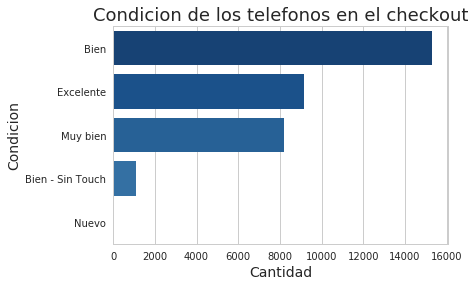

In [6]:
condicion = checkout['condition'].value_counts().sort_values(ascending = False).rename({'Bom':'Bien','Muito Bom':'Muy bien','Bom - Sem Touch ID':'Bien - Sin Touch','Novo':'Nuevo'})
g = sns.barplot(y=condicion.index, x=condicion.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Condicion de los telefonos en el checkout',fontsize = 18)
g.set_ylabel('Condicion',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

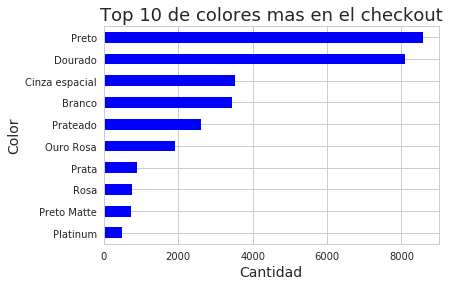

In [7]:
g = checkout['color'].value_counts().head(10).sort_values().plot(kind = 'barh',color ='blue')
g.set_title('Top 10 de colores mas en el checkout',fontsize = 18)
g.set_ylabel('Color',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

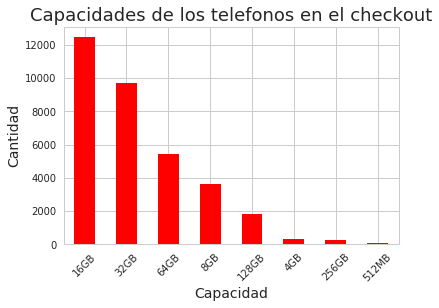

In [8]:
g = checkout['storage'].value_counts().plot(kind = 'bar', color='red')
g.set_title('Capacidades de los telefonos en el checkout',fontsize = 18)
g.set_xlabel('Capacidad',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

Se puede ver que los telefonos de 16GB/32GB/64GB/128GB son los que mas veces llegaron al checkout, mientras que los de menor capacidad no tiene una alta demanda, se recomienda tener mas stock de estos telefonos

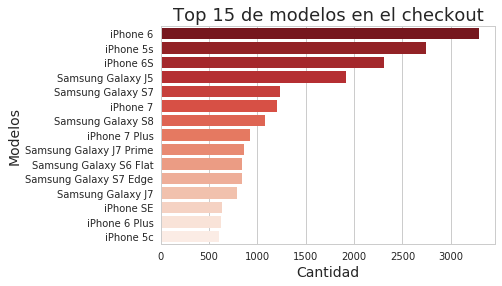

In [9]:
check = checkout['model'].value_counts().head(15).sort_values(ascending = False)
g = sns.barplot(y=check.index, x=check.values, palette=sns.color_palette('Reds_r', 15))
g.set_title('Top 15 de modelos en el checkout',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14); #Estaria bueno superponer este grafico con el otro para compara el ranking de busqueda contra compra
                                      #y sacar conclusiones

#### Al igual que los modelos mas buscados, los iPhone son los telefonos mas demandados. En segundo lugar estan los Samsung galaxy S7, S8 y J5. 

#### Analizamos las caracteristicas de los modelos mas comprados

In [10]:
iPhone6_checkout = checkout[checkout['model'] == 'iPhone 6']
iPhone6_checkout = iPhone6_checkout[['storage','condition']]
iPhone6_checkout = pd.DataFrame(iPhone6_checkout.groupby('storage')['condition'].value_counts())
iPhone6_checkout = iPhone6_checkout.rename(columns = {'condition':'cantidad'})
iPhone6_checkout = iPhone6_checkout.reset_index()
iPhone6_checkout = iPhone6_checkout.rename(columns = {'storage':'capacidad'})
iPhone6_checkout = iPhone6_checkout.pivot('capacidad','condition','cantidad')
iPhone6_checkout

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
capacidad,,,,
128GB,110,5,60,60
16GB,903,284,438,298
64GB,524,10,326,277


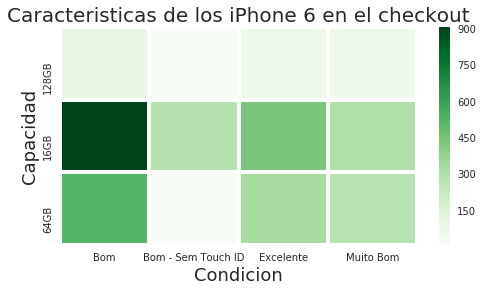

In [11]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(iPhone6_checkout,linewidth = 3, cmap = 'Greens')
ax.set_title('Caracteristicas de los iPhone 6 en el checkout',Fontsize = 20)
ax.set_ylabel('Capacidad',Fontsize = 18)
ax.set_xlabel('Condicion',fontsize = 18);

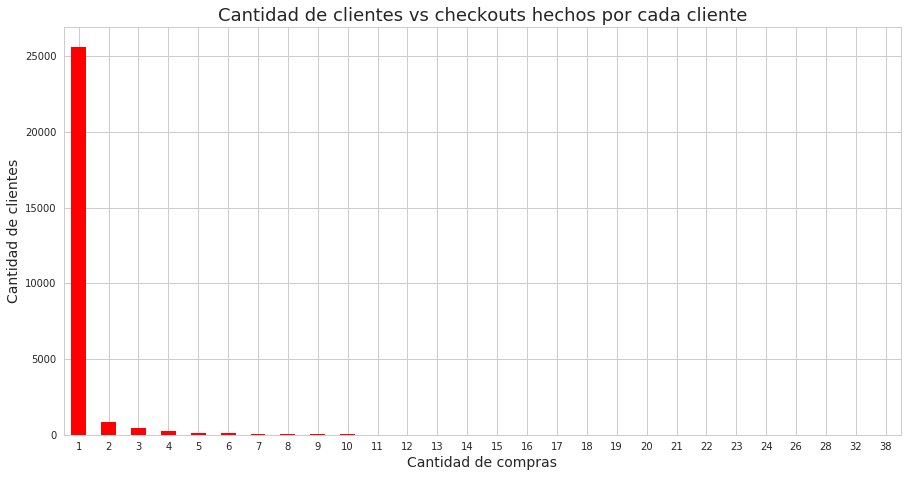

In [12]:
g = checkout['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color='red',  figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
g.set_title('Cantidad de clientes vs checkouts hechos por cada cliente',fontsize = 18)
g.set_xlabel('Cantidad de compras',fontsize = 14)
g.set_ylabel('Cantidad de clientes',fontsize = 14);
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10);

#### ¿Cuando hay mayor actividad en el checkout a lo largo de la semana?

In [13]:
dias = checkout['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       4621
Tuesday      5928
Wednesday    5772
Thursday     5559
Friday       5244
Saturday     3474
Sunday       3137
Name: timestamp, dtype: int64

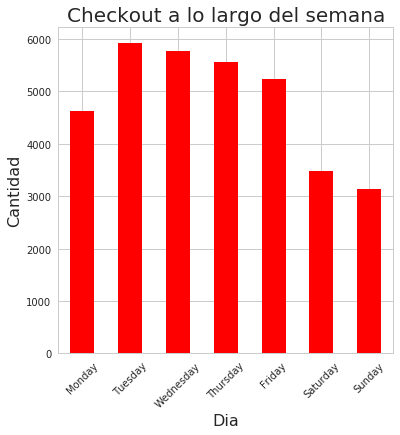

In [14]:
g = plt.subplots(figsize = (6,6))
g = dias.plot(kind = 'bar',color='red')
g.set_title('Checkout a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

#### ¿Cuando hubo mayor actividad en el checkout a lo largo del año?

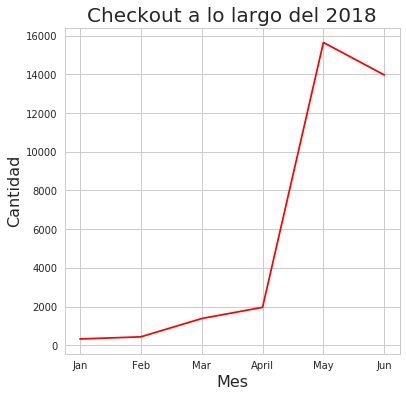

In [15]:
check = checkout['timestamp'].dt.month.value_counts().sort_index()
g = plt.subplots(figsize = (6,6))
g = check.plot(color='red')
g.set_title('Checkout a lo largo del 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([1, 2, 3, 4, 5, 6], ["Jan", "Feb", "Mar", "April", "May", "Jun"]);

#### Checkout del primer trimestre vs checkout en el segundo trimestre

In [16]:
primer_trimestre = checkout[checkout['timestamp'].dt.month < 4]['timestamp'].dt.month.value_counts().sort_index()
segundo_trimestre = checkout[checkout['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()

In [17]:
trimestres = pd.DataFrame({'First term':primer_trimestre.values,'Second term':segundo_trimestre.values})

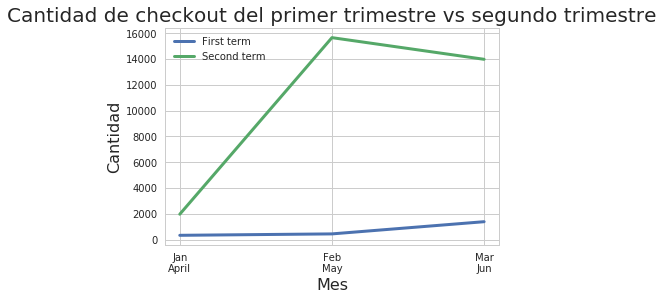

In [18]:
g = trimestres.plot(linewidth=3)
g.set_title('Cantidad de checkout del primer trimestre vs segundo trimestre',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([0, 1,2], ["Jan\nApril", "Feb\nMay", "Mar\nJun"]);

Se puede ver como en el segundo trimestre del año la actividad en la pagina crecio, esto puede ser por una falta de datos del primer trimestre o por la publicadad que se hizo. #Nose si estaria bien poner algo asi

## Productos y marcas mas buscadas

In [19]:
searched_products = events[events['event'] == 'searched products']
searched_products = searched_products[['timestamp','person','search_term']]
searched_products.head()

,timestamp,person,search_term
157,2018-02-06 02:29:49,00204059,moto g 4
159,2018-02-06 02:32:41,00204059,moto g 4
238,2018-05-21 19:56:33,0024ad28,comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,0024ad28,comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,0024ad28,comprar celulares seminovos bom e barato em po...


In [20]:
searched_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56073 entries, 157 to 1011280
Data columns (total 3 columns):
timestamp      56073 non-null datetime64[ns]
person         56073 non-null object
search_term    48967 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [21]:
searched_products['search_term'].isnull().value_counts() # habría que decidir que hacemos con los nulls

False    48967
True      7106
Name: search_term, dtype: int64

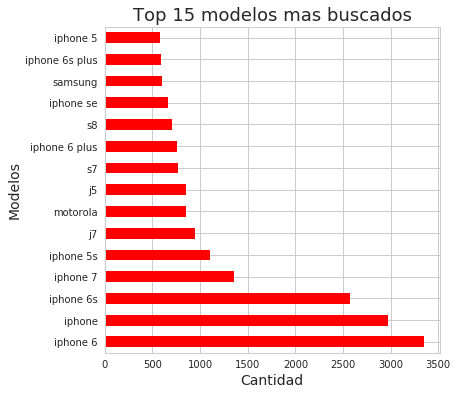

In [22]:
busquedas = searched_products['search_term'].dropna().map(lambda x: x.lower()).value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = busquedas.plot(kind = 'barh',color='red')
g.set_title('Top 15 modelos mas buscados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14);

In [23]:
#el diccionario esta hecho a mano, vi las primeras posiciones y de ahi arme el diccionario, se podria pensar algo mejor. 
#no vi por ahora alguna funcion que haga la que defini, por ahi hay algo hecho pero no encontre
marcas = {'iPhone':['iphone','7s','6s','5se','5c','iphone se'], 'Samsung':['j1','j2','j3','j4','j5','j6','j7','galaxy','s7','s6','s5','s8','s9','samsung'], 'Motorola':['moto'],'LG':['lg']}
def asignar_marca(modelo):
    for marca in marcas:
        for m in marcas[marca]:
            if m in modelo:
                return marca
    return 'Otro'
marcas_buscadas = searched_products['search_term'].dropna().map(lambda x: asignar_marca(x.lower())).value_counts()
marcas_buscadas 

iPhone      18982
Samsung     14659
Otro         8369
Motorola     5773
LG           1184
Name: search_term, dtype: int64

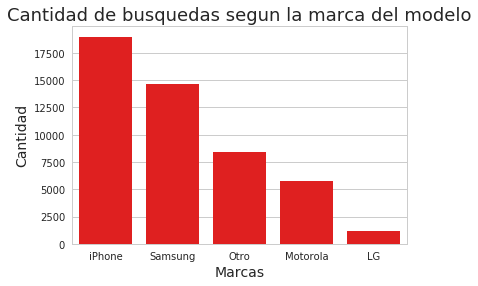

In [24]:
g = sns.barplot(x= marcas_buscadas.index, y=marcas_buscadas.values, orient= 'v',color='red')
g.set_title('Cantidad de busquedas segun la marca del modelo',fontsize = 18)
g.set_xlabel('Marcas',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

In [25]:
primer_trimestre = searched_products[searched_products['timestamp'].dt.month < 4]['timestamp'].dt.month.value_counts().sort_index()
segundo_trimestre = searched_products[searched_products['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()

In [26]:
trimestres = pd.DataFrame({'First term':primer_trimestre.values,'Second term':segundo_trimestre.values})
trimestres

,First term,Second term
0,1341,6761
1,1507,26078
2,4010,16376


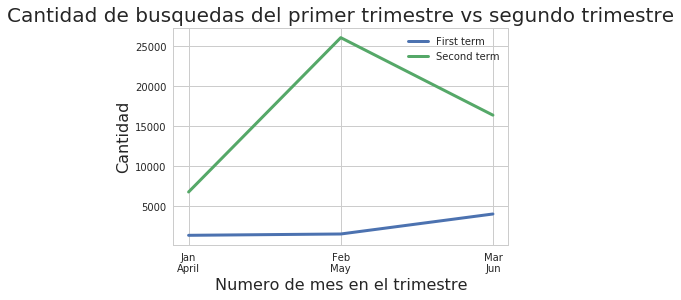

In [27]:
g = trimestres.plot(linewidth=3)
g.set_title('Cantidad de busquedas del primer trimestre vs segundo trimestre',fontsize = 20)
g.set_xlabel('Numero de mes en el trimestre',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([0, 1,2], ["Jan\nApril", "Feb\nMay", "Mar\nJun"]);

#### ¿Se relaciona la cantidad de busquedas con la cantidad de compras a lo largo del mes? #agrega sku

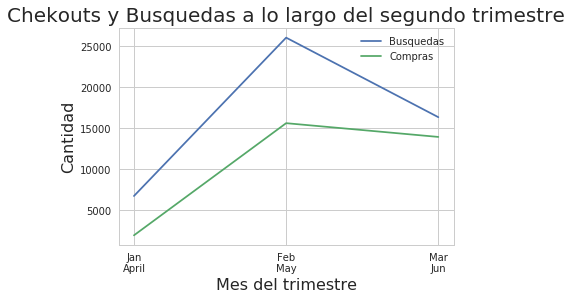

In [28]:
busquedas = searched_products[searched_products['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
compras = checkout[checkout['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
busquedas_vs_compras = busquedas.to_frame().rename({'timestamp':'Busquedas'},axis = 'columns') 
busquedas_vs_compras['Compras'] = compras
g = busquedas_vs_compras.plot()
g.set_title('Chekouts y Busquedas a lo largo del segundo trimestre',fontsize = 20)
g.set_xlabel('Mes del trimestre',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([1, 2,3], ["Jan\nApril", "Feb\nMay", "Mar\nJun"]);

#### #hay que darle algun nombre a lo que sigue

In [29]:
events['marca'] = events['model'].str.split(' ').str[0]
events['modelo'] = events['model'].str.split(' ').str[1].fillna('') + ' ' + events['model'].str.split(' ').str[2].fillna('')
events[['marca', 'modelo']].head()

,marca,modelo
0,NaN,
1,NaN,
2,iPhone,5s
3,iPhone,5s
4,Samsung,Galaxy S8


In [30]:
events.groupby('marca').agg({'event':'count'}).sort_values(by = 'event', ascending = False)

,event
marca,
iPhone,256585
Samsung,218127
Motorola,63518
LG,9724
Sony,7025
Lenovo,4779
Asus,2091
iPad,1914
Quantum,520


In [31]:
events.groupby(['marca', 'model']).agg({'event':'count'}).sort_values(by = 'event', ascending = False).head(15)

event
marca   model                        
iPhone  iPhone 6                50916
        iPhone 5s               44878
        iPhone 6S               39296
        iPhone 7                27556
Samsung Samsung Galaxy S7 Edge  23926
        Samsung Galaxy S7       19337
iPhone  iPhone 7 Plus           18792
Samsung Samsung Galaxy S8       16959
iPhone  iPhone SE               16531
Samsung Samsung Galaxy J5       13044
iPhone  iPhone 6S Plus          12855
        iPhone 6 Plus           12766
        iPhone 5c               12689
Samsung Samsung Galaxy S6 Flat  11608
        Samsung Galaxy S6 Edge  11175

In [32]:
viewed_events = events[events['event'] == 'viewed product']
leaded_events = events[events['event'] == 'lead']
conversion_events = events[events['event'] == 'conversion']
checkouted_events = events[events['event'] == 'checkout']

Text(0,0.5,'Cantidad')

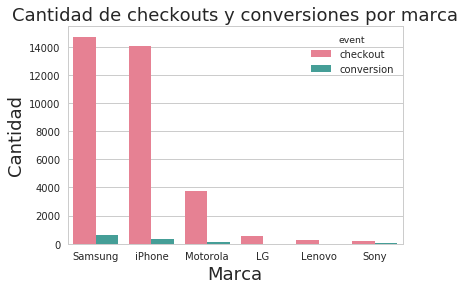

In [33]:
checkouted_vs_converted = events[(events['event'] == 'conversion') | (events['event'] == 'checkout')]
checkouted_vs_converted
pd.crosstab(checkouted_vs_converted.marca, checkouted_vs_converted.event)

g = sns.countplot(x="marca"[:5], hue="event", data=checkouted_vs_converted, palette="husl", hue_order = checkouted_vs_converted.event.value_counts().iloc[:2].index,
                 order = checkouted_vs_converted.marca.value_counts().iloc[:6].index)
g.set_title("Cantidad de checkouts y conversiones por marca", fontsize=18)
g.set_xlabel("Marca", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

Text(0,0.5,'Cantidad')

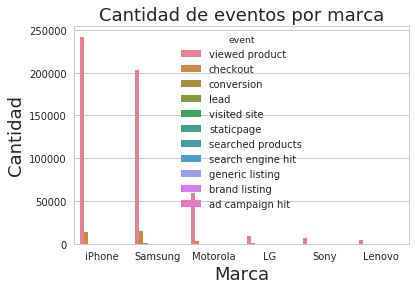

In [34]:
# es mucha la diferencia entre la cantidad de productos vistos vs checkout
g = sns.countplot(x="marca", hue="event", data=events, palette="husl", hue_order = events[['event', 'marca']].dropna().event.value_counts().iloc[:].index,
                 order = events.marca.value_counts().iloc[:6].index)
g.set_title("Cantidad de eventos por marca", fontsize=18)
g.set_xlabel("Marca", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

Cantidad de vistas a productos antes de comprar 
falta graficar y revisar si está bien

In [37]:
viewed = viewed_events[['timestamp', 'person']]
converted = conversion_events[['timestamp', 'person']]
merged = pd.merge(viewed, converted, on='person', how='left')
merged = merged[(merged['timestamp_y'] > merged['timestamp_x'])]
merged['dif'] = merged['timestamp_y'] - merged['timestamp_x']
merged = merged[merged['dif'].dt.days == 0]
merged = merged.groupby(['person', 'timestamp_y']).agg({'timestamp_x':'count'})
merged.head()

,,timestamp_x
person,timestamp_y,
00c13dee,2018-04-26 22:28:53,10
0146a9df,2018-03-16 13:50:25,1
01db2fe6,2018-02-09 22:07:07,12
03bdcd81,2018-01-09 16:47:50,13
04850add,2018-01-23 22:26:36,63


In [38]:
# personas que se suscribieron para un producto
# no se suscriben a muchos productos, ¿por qué?
leaded_persons = leaded_events[['person','timestamp']] 
leaded_persons = leaded_persons.groupby('person').agg({'timestamp':'count'}).reset_index()
leaded_persons.columns = ['person', 'leaded products'] 
leaded_persons = leaded_persons.sort_values(by='leaded products', ascending=False)
leaded_persons.head()

,person,leaded products
176,97e0bcf2,16
87,52a4edd3,11
93,58692743,8
164,8dd8c1b4,6
237,d5661793,5


In [39]:
# personas que volvieron por canal = EMAIL (ver si esto esta bien.
# entiendo que la notif del producto listo llega por email)
returning = events[(events['new_vs_returning'] == 'Returning') & (events['channel'] == 'Email')][['person', 'timestamp', 'channel']]
returning.head()

,person,timestamp,channel
10786,02d599d3,2018-03-12 21:05:50,Email
31946,08cd79ec,2018-04-01 21:01:08,Email
41690,0bb3e374,2018-05-06 23:14:11,Email
88856,1880d52f,2018-05-06 14:01:30,Email
124947,2169c977,2018-04-18 08:41:24,Email


In [40]:
# personas que se suscribieron y volvieron ( son muy pocas )
a = pd.merge(leaded_events[['person','timestamp']] , returning, on='person', how='left')
a = a[(a['timestamp_y'] > a['timestamp_x'])] # fecha de retorno > fecha de lead
a = a.groupby('person').agg({'timestamp_y': pd.Series.nunique})
a.reset_index(inplace = True)
a.columns = ['person', 'times back'] 
a

,person,times back
0,50ee5606,1
1,52a4edd3,3
2,f3b4afa1,1


# veo cuantos de los que marcaron un producto como lead, lo terminan comprando

In [136]:
leaded_models = leaded_events[['person','timestamp', 'marca', 'modelo']] 
converted_models = conversion_events[['timestamp', 'person', 'marca', 'modelo']]
merged = pd.merge(leaded_models, converted_models, on='person', how='left')
merged = merged[merged['timestamp_x'] < merged['timestamp_y']]
merged = merged.groupby(['person', 'timestamp_y', 'marca_y', 'modelo_y'], as_index=False)[['marca_x', 'modelo_x']].aggregate(lambda x: list(x))
merged.head(10)


,person,timestamp_y,marca_y,modelo_y,marca_x,modelo_x
0,03bdcd81,2018-01-09 16:47:50,Samsung,Galaxy S6,[Samsung],[Galaxy S7]
1,19b38ba2,2018-03-30 08:24:58,Sony,Xperia M4,[Sony],[Xperia M4]
2,19b38ba2,2018-03-30 16:01:02,Samsung,Galaxy J7,[Sony],[Xperia M4]
3,19b38ba2,2018-03-30 19:15:28,Samsung,Galaxy S5,[Sony],[Xperia M4]
4,19b38ba2,2018-03-31 04:33:57,Sony,Xperia M4,[Sony],[Xperia M4]
5,19b38ba2,2018-04-03 07:23:18,Samsung,Galaxy A5,[Sony],[Xperia M4]
6,19b38ba2,2018-04-11 15:20:25,LG,G4 H815P,"[Sony, LG]","[Xperia M4, G4 H815P]"
7,19b38ba2,2018-05-10 22:50:34,Samsung,Galaxy J7,"[Sony, LG]","[Xperia M4, G4 H815P]"
8,19fe94db,2018-04-23 00:56:23,Samsung,Galaxy J5,"[Samsung, Samsung]","[Galaxy J7, Galaxy J3]"
9,1ac00500,2018-04-16 18:55:43,Sony,Xperia Z3,"[Motorola, Samsung]","[Moto G4, Galaxy A7]"


In [143]:
# veo quienes compraron la misma marca 
merged['misma_marca'] = merged.apply(lambda x: x.marca_y in x.marca_x, axis=1)
merged['misma_marca'].value_counts()


True     75
False    24
Name: misma_marca, dtype: int64

In [153]:
# veo quienes compraron la misma marca y modelo
merged['misma_marca_modelo'] = merged[merged['misma_marca'] == True].apply(lambda x: x.modelo_y in x.modelo_x, axis=1, )
merged['misma_marca_modelo'].fillna(value=False, inplace=True)
merged.groupby(['misma_marca', 'misma_marca_modelo']).agg({'person':'count'})

person
misma_marca misma_marca_modelo        
False       False                   24
True        False                   33
            True                    42

In [155]:
# graficar lo de arriba.
# la mayoría vuelve a comprar el mismo producto, o un modelo diferente pero de la misma marca
# hay mucha gente que no volvió a comprar (¿por que? ¿falta enviar mails, reponer stock?)

In [180]:
# hay 291 personas que pusieron en lead productos
# y solo 49 compraron después
leaded_models.groupby('person').count().shape

(291, 3)

In [179]:
merged.groupby('person').count().shape

(49, 7)

In [ ]:
#falta agregar las compras al analisis, solo hay del checkout y de busquedas
#falta analisar si en los dias de la semana los eventos son parejos o hay outlayers (por ahi boxplot va bien)